In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('Online Retail.xlsx')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# describing the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


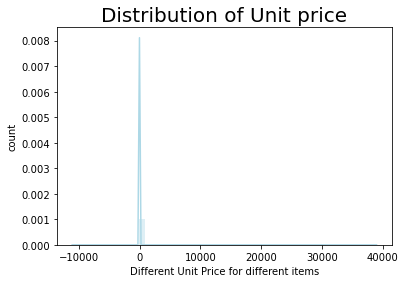

In [8]:
# visualizing the unitprice

sns.distplot(data['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

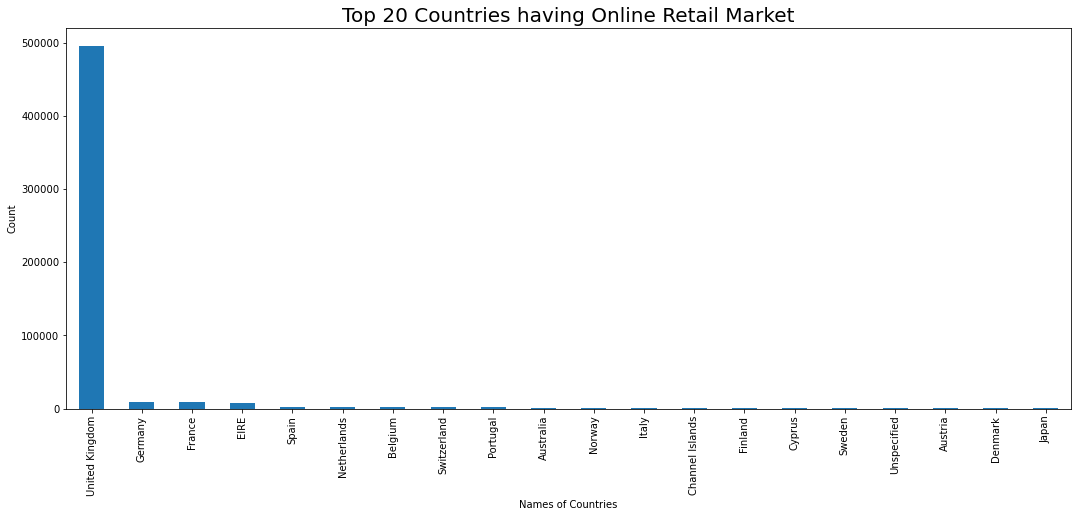

In [9]:
# checking the different values for country in the dataset

data['Country'].value_counts().head(20).plot.bar(figsize = (18, 7))
plt.title('Top 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

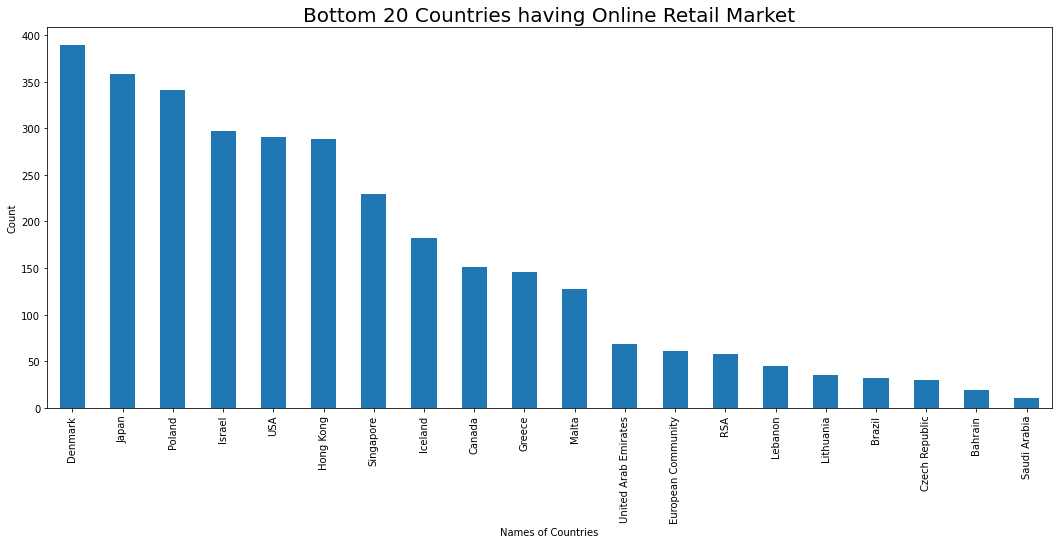

In [10]:
# checking the different values for country in the dataset

data['Country'].value_counts().tail(20).plot.bar(figsize = (18, 7))
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [11]:
# checking how many quantity of products have been sold online from each country

data['Quantity'].groupby(data['Country']).agg('sum')

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


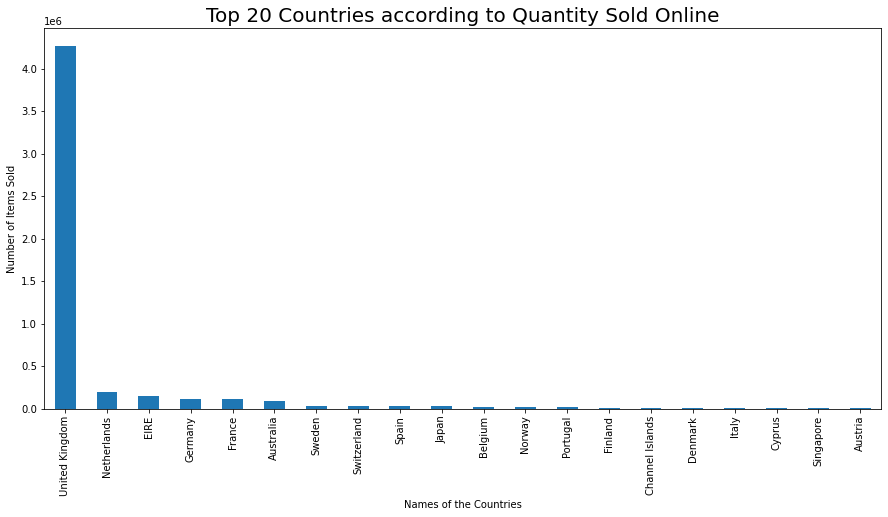

In [12]:
# Having a look at the top 20 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

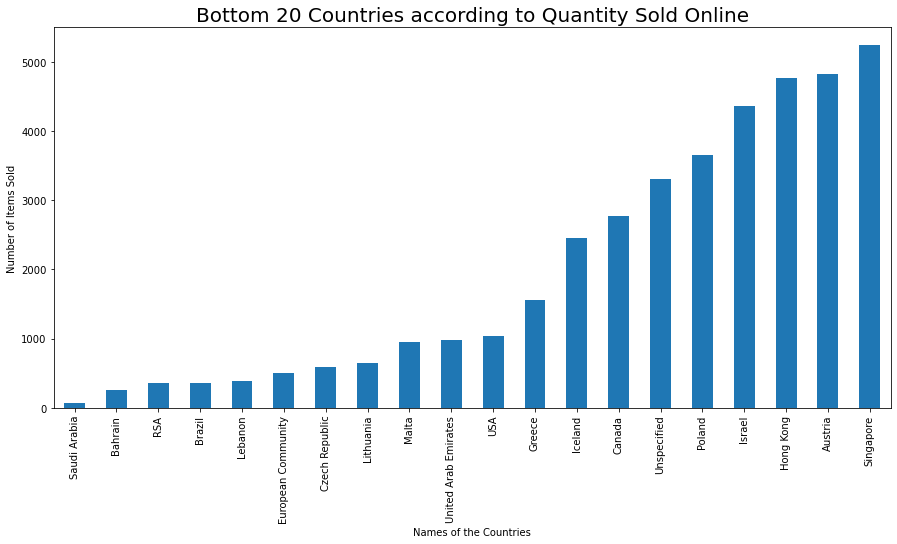

In [13]:
# Having a look at the bottom 20 Countries in terms of Quantities according to the countries

data['Quantity'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

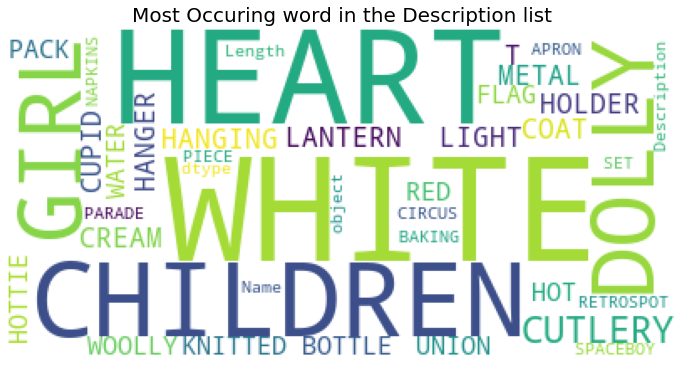

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(data['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

C:\Users\tset\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


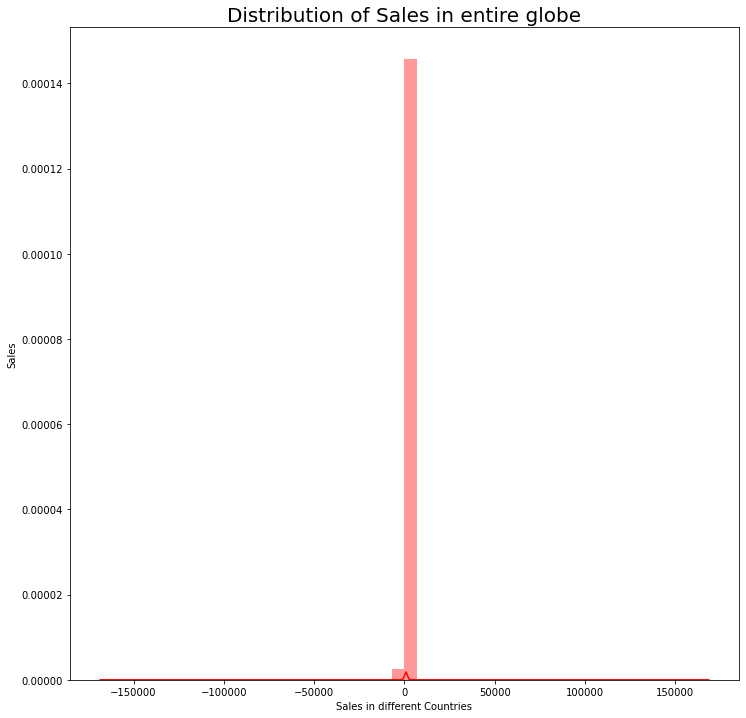

In [15]:
# FEATURE ENGINEERING 
# ADDING A COLUMN TO THE DATASET

# sales = unitprice*quantity

data['Sales'] = data['UnitPrice'] * data['Quantity']

# visualizing the sales in the entire globe
sns.distplot(data['Sales'], color = 'red')
plt.title('Distribution of Sales in entire globe', fontsize = 20)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

In [16]:
# looking at each country's sales

data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = False)

Country
United Kingdom          8.187806e+06
Netherlands             2.846615e+05
EIRE                    2.632768e+05
Germany                 2.216982e+05
France                  1.974039e+05
Australia               1.370773e+05
Switzerland             5.638535e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.936702e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Hong Kong               1.011704e+04
Singapore               9.120390e+03
Israel                  7.907820e+03
Poland                  7.213140e+03
Unspecified             4.749790e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.6663

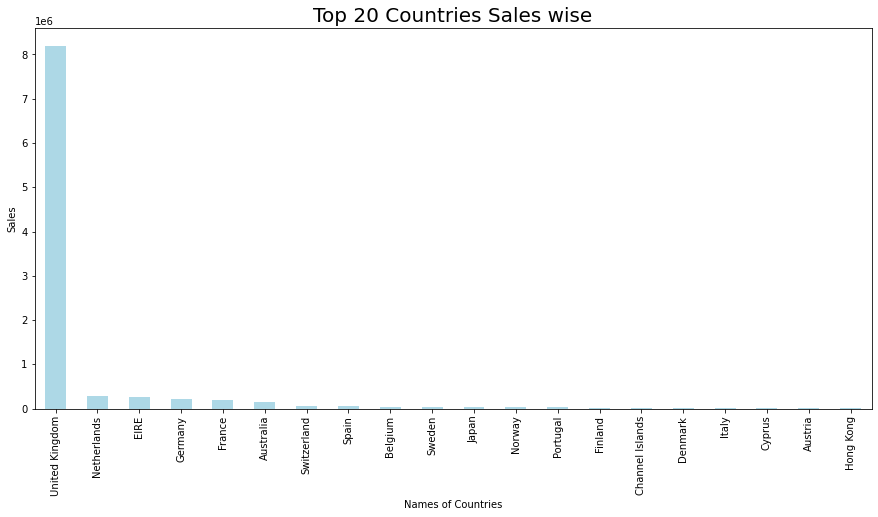

In [17]:
# looking at the top 20 countries sales wise

data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7), color = 'lightblue')
plt.title('Top 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

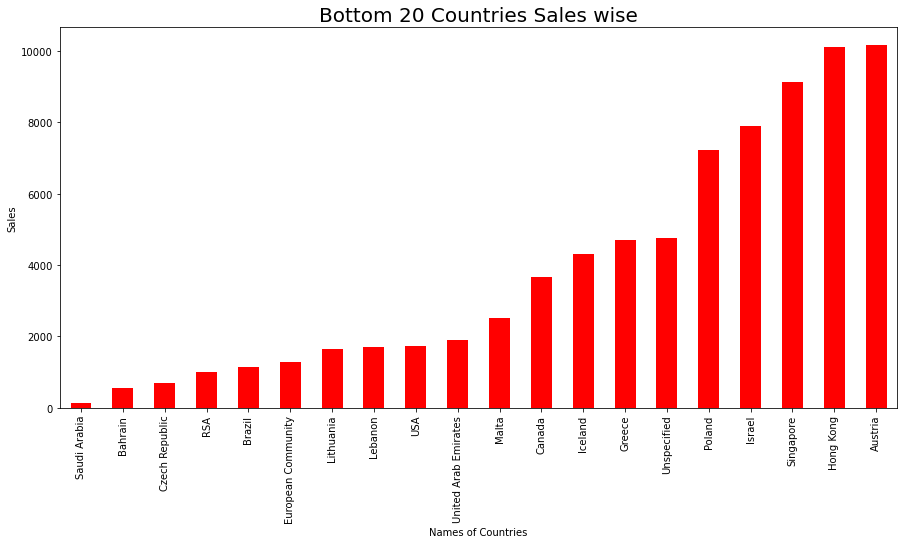

In [18]:
# looking at the bottom 20 countries sales wise

data['Sales'].groupby(data['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'red')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

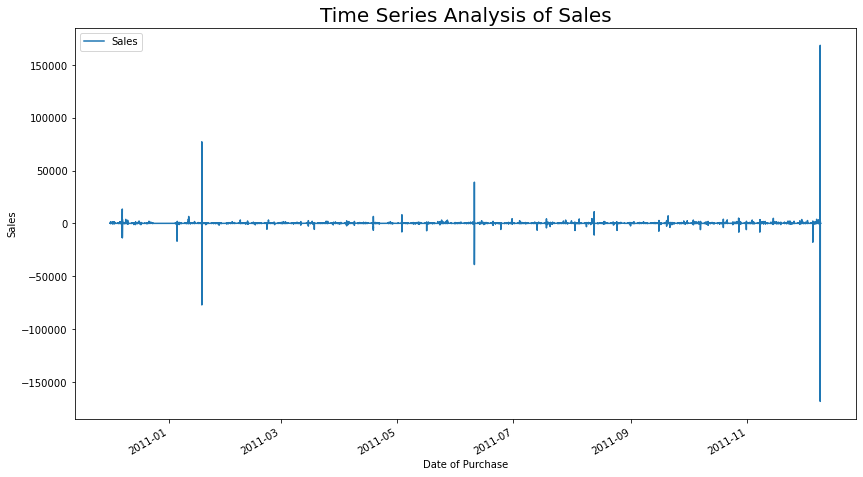

In [19]:
# let's look at Sales vs Invoicedate (Time series Analysis)

plt.rcParams['figure.figsize'] = (14, 8)
data.plot(x = 'InvoiceDate', y = 'Sales')
plt.title("Time Series Analysis of Sales", fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales')
plt.show()

In [20]:
# checking how many unique customer IDs are there

x = data['CustomerID'].nunique()

# printing the value
print("There are {} number of different customers".format(x))

There are 4372 number of different customers


In [21]:
# checking different number of unique countries present in this dataset

x = data['Country'].nunique()

# printing the result
print("There are {} number of different countries who do online retailing from UK".format(x))

There are 38 number of different countries who do online retailing from UK


Text(0.5, 1.0, 'Time-Series plot for UK')

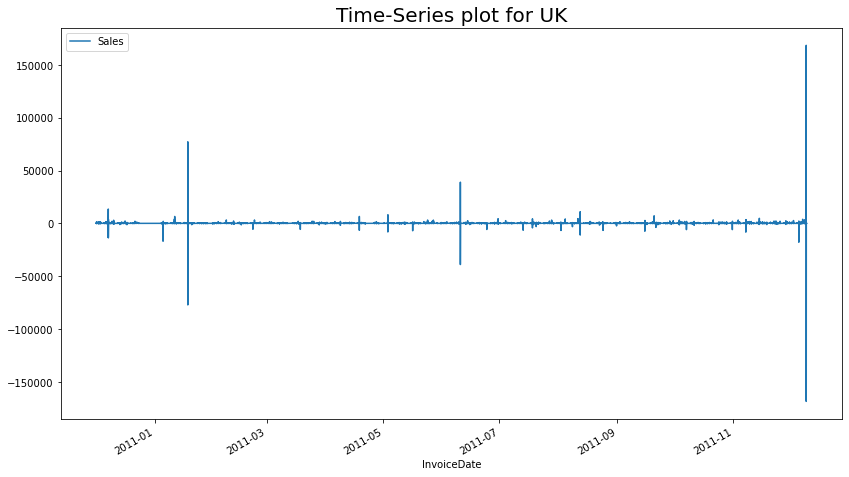

In [22]:
# defining a function to plot time-series plot for any country

def time_series(country):
  dataset = data[data['Country'] == country]
  dataset.plot(x = 'InvoiceDate', y = 'Sales')
  
  
time_series('United Kingdom')
plt.title('Time-Series plot for UK', fontsize = 20)

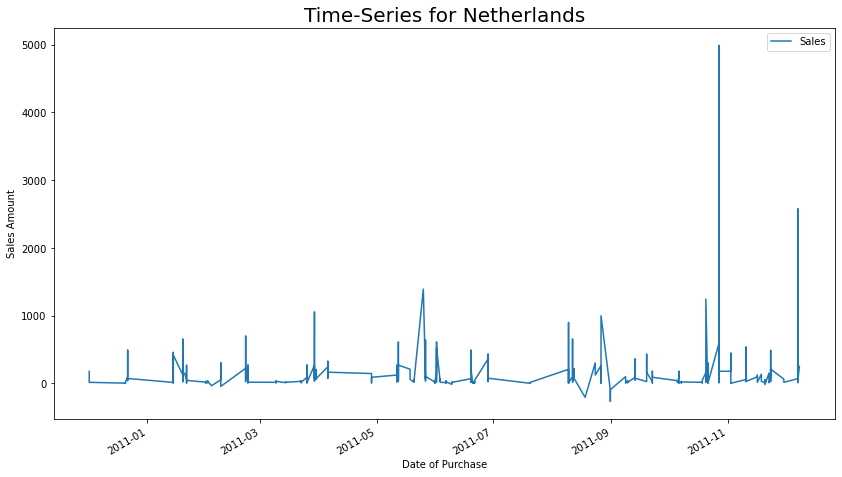

In [23]:
# time-series plot for netherlands

dataset = data[data['Country'] == 'Netherlands']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Netherlands', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

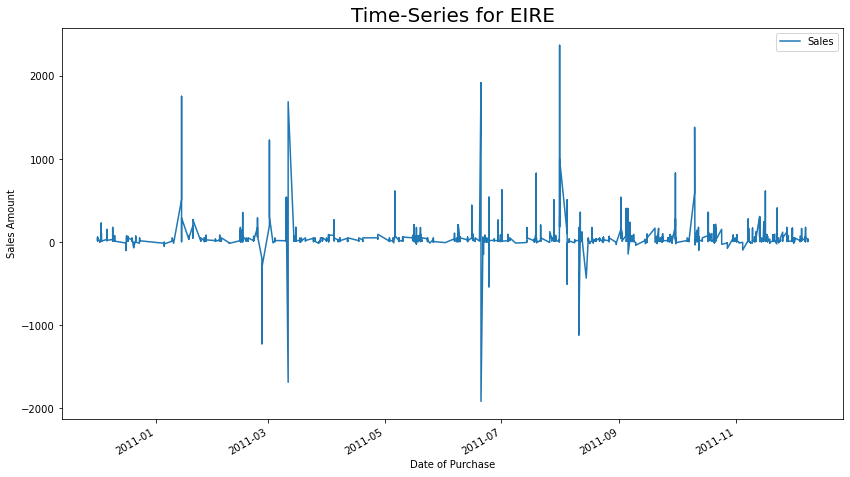

In [24]:
# time-series plot for EIRE

dataset = data[data['Country'] == 'EIRE']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for EIRE', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

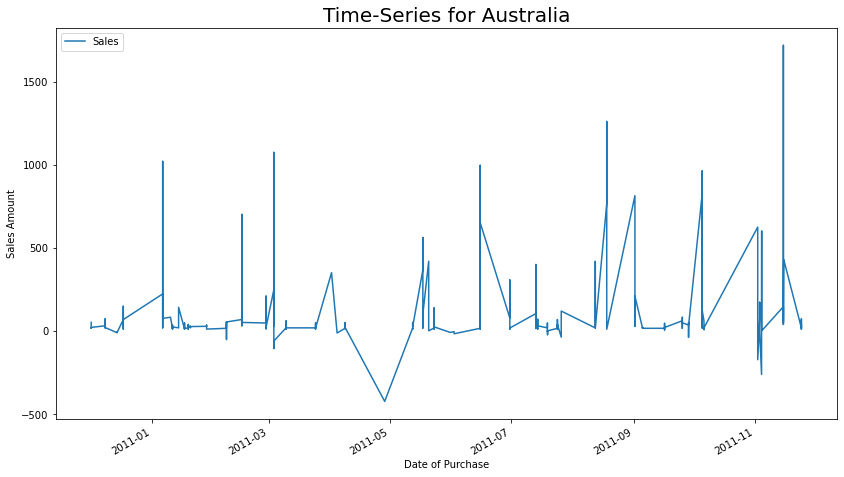

In [25]:
# time-series plot for Australia

dataset = data[data['Country'] == 'Australia']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Australia', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

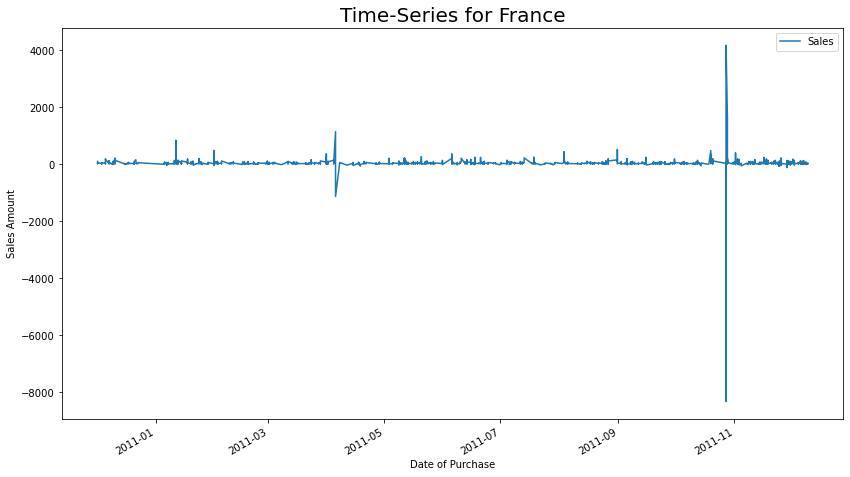

In [26]:
# time-series plot for France

dataset = data[data['Country'] == 'France']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for France', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

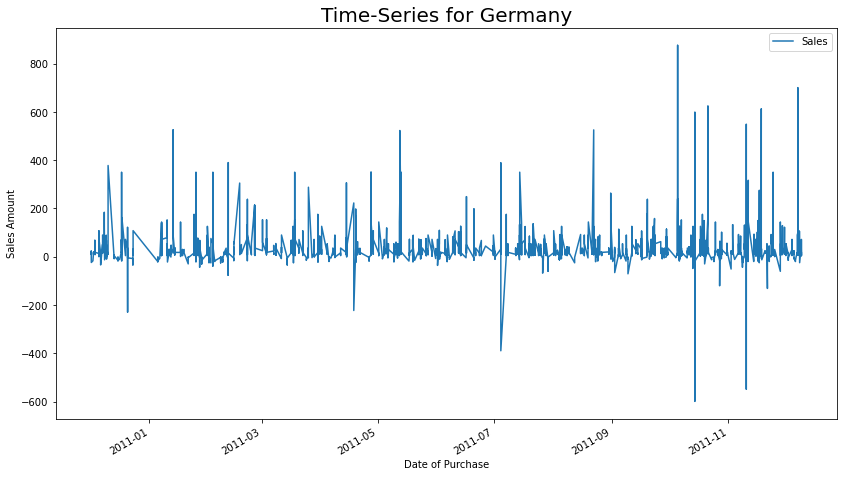

In [27]:
# time-series plot for Germany

dataset = data[data['Country'] == 'Germany']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Germany', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

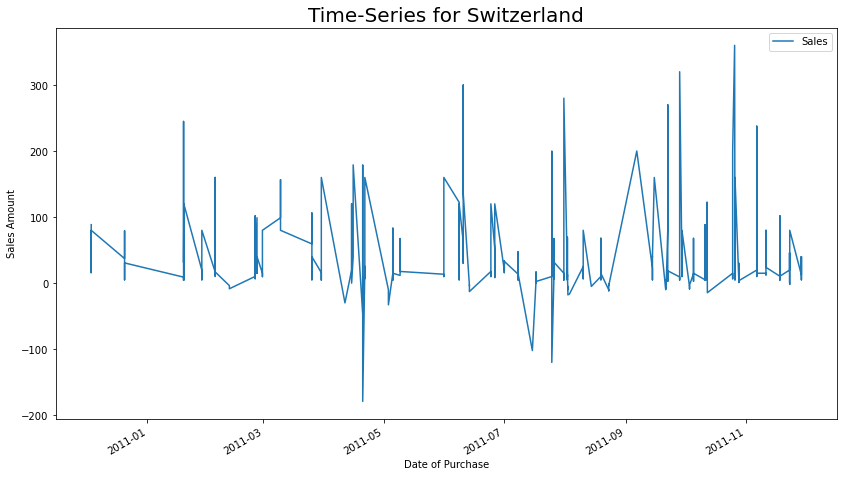

In [28]:
# time-series plot for Switzlerland

dataset = data[data['Country'] == 'Switzerland']
dataset.plot(x = 'InvoiceDate', y = 'Sales')
plt.title('Time-Series for Switzerland', fontsize = 20)
plt.xlabel('Date of Purchase')
plt.ylabel('Sales Amount')
plt.show()

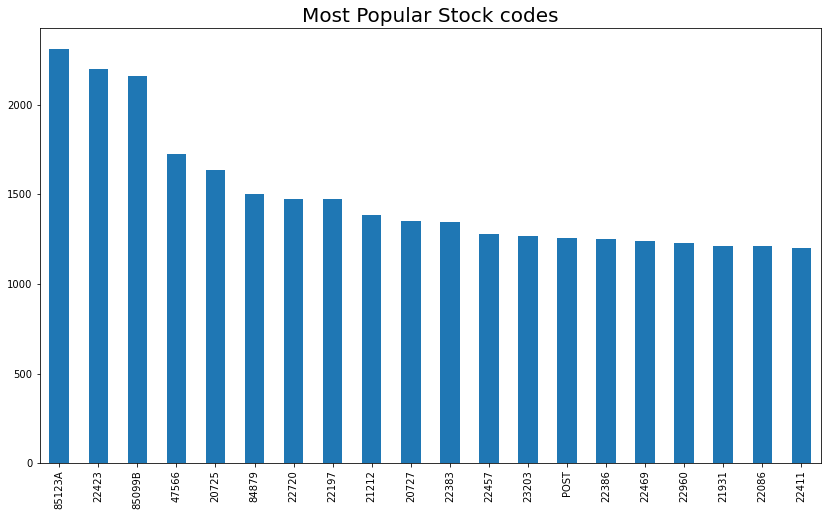

In [29]:
# looking the stockcode for the datset

data['StockCode'].value_counts().head(20).plot.bar()
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

In [30]:
# sorting the dataset by sales amount

data.sort_values(by = 'Sales')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
...,...,...,...,...,...,...,...,...,...
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60


In [31]:
# sorting the datset by unit price

data.sort_values(by = 'UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom,0.00
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom,0.00
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,-16453.71
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
